In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

print("Libraries imported")

Libraries imported


In [2]:
# Load the dataset
fish_data = pd.read_csv('/kaggle/input/fish-market/Fish.csv')

# Display the first few rows of the dataset
print(fish_data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fish-market/Fish.csv'

Libraries imported
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000  

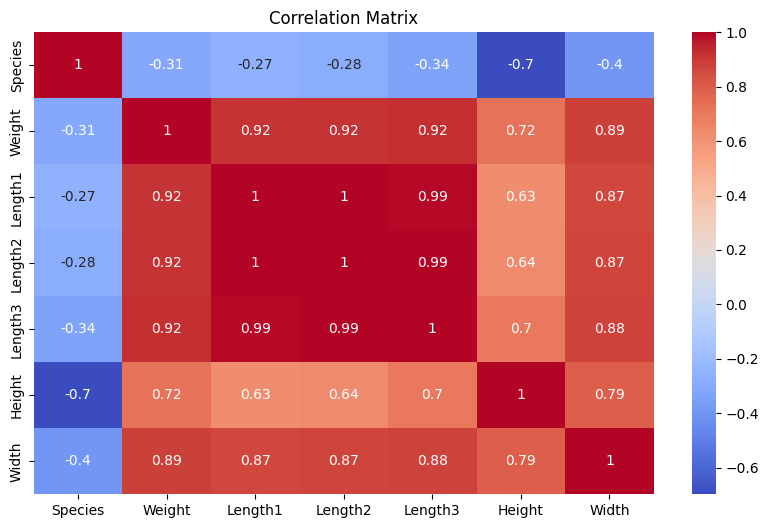

Mean Squared Error: 2.65625
R^2 Score: 0.38055112730585283
Cross-validated R^2 scores: [  0.          -1.23906706 -29.83333333   0.          -3.65651261]
Mean R^2 score: -6.945782598753787


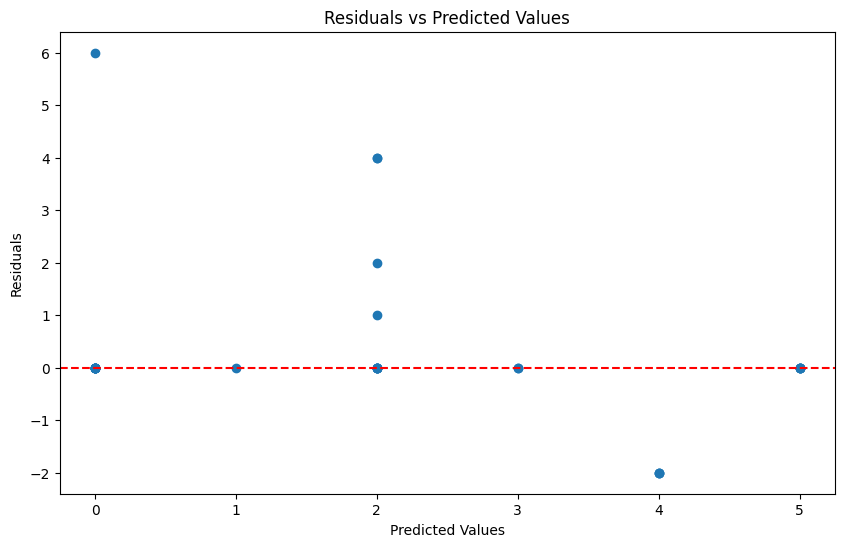

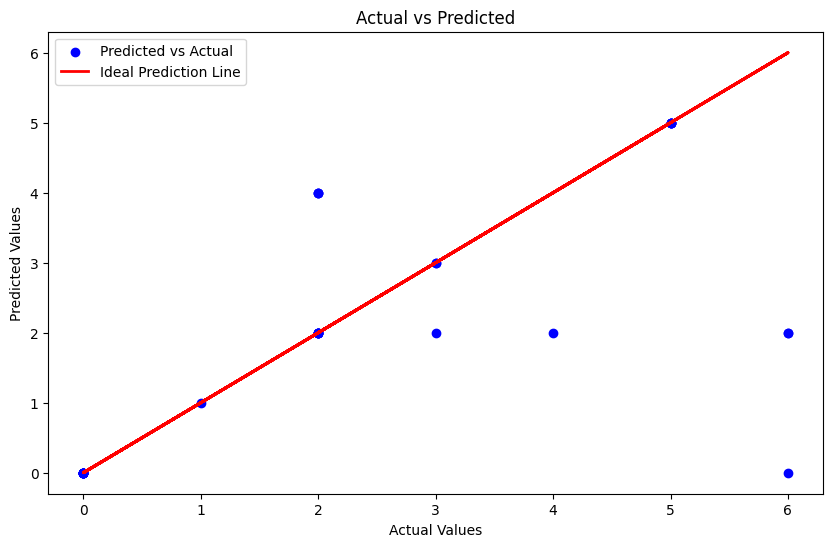

['decision_tree_model.pkl']

In [9]:
# Display summary statistics
print(fish_data.describe())

# Correlation Matrix (give error)
# plt.figure(figsize=(10, 6))
# sns.heatmap(fish_data.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# fixes :
# Convert categorical variables to numeric (if necessary)
fish_data['Species'] = fish_data['Species'].astype('category').cat.codes

# Correlation Matrix for numeric features only
plt.figure(figsize=(10, 6))
sns.heatmap(fish_data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Preprocess the data
# Specify feature columns and target column
feature_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']  # Adjust as necessary
target_col = 'Species'  # Adjust this to your target column

# Convert categorical target variable to numerical (if necessary)
fish_data['Species'] = fish_data['Species'].astype('category').cat.codes

# Split the data into features and target
X = fish_data[feature_cols]
y = fish_data[target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {scores}')
print(f'Mean R^2 score: {scores.mean()}')

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Optionally, visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predicted vs Actual', color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Ideal Prediction Line')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Save the model
joblib.dump(model, 'decision_tree_model.pkl')


**Key Features:**
Libraries: Imports necessary libraries for data manipulation, visualization, and modeling. 

Dataset: Loads and displays the fish market dataset.

Data Exploration: Shows summary statistics and a correlation matrix.

Data Preparation: Prepares the dataset for training by converting categorical variables and splitting it.

Model Training: Trains a Decision Tree model and makes predictions.

Evaluation: Calculates and displays evaluation metrics like Mean Squared Error and R² score, along with cross-validation results.

Residuals Analysis: Visualizes residuals to assess model performance.

Predicted vs Actual: Compares predicted and actual values with a scatter plot.

Model Saving: Saves the trained model for future use.